In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('../data/gs_2307_sub_m1.csv')
df2 = pd.read_csv('../data/gs_2407_m1.csv')

In [5]:
tmp1 = df1[df1['target'] == 1]
tmp2 = df2[df2['target'] == 1]

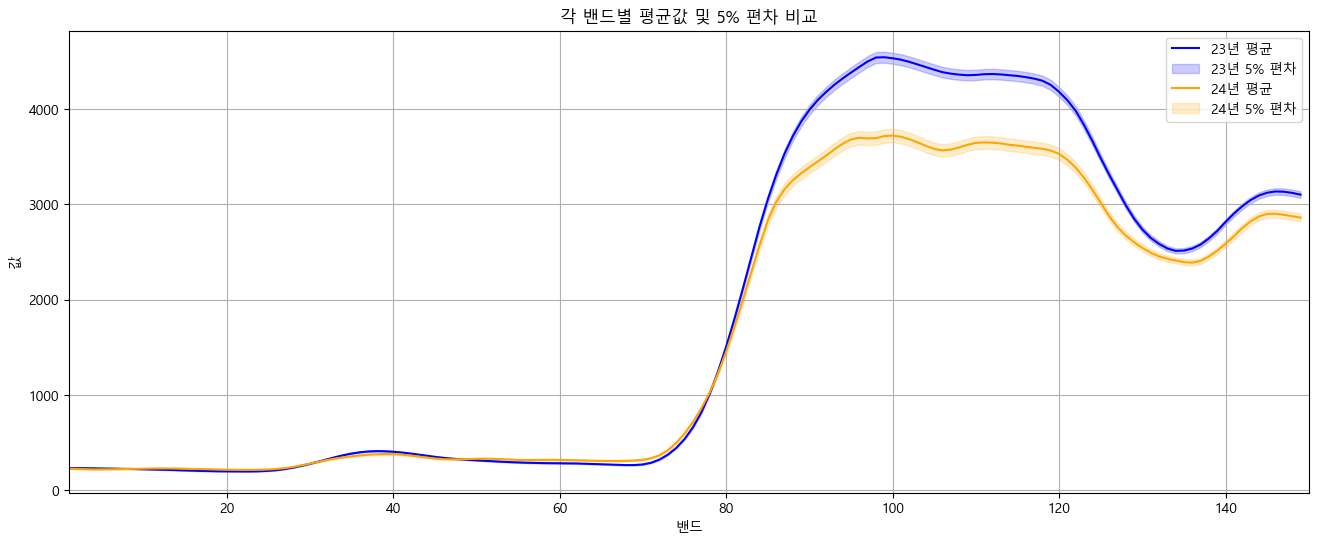

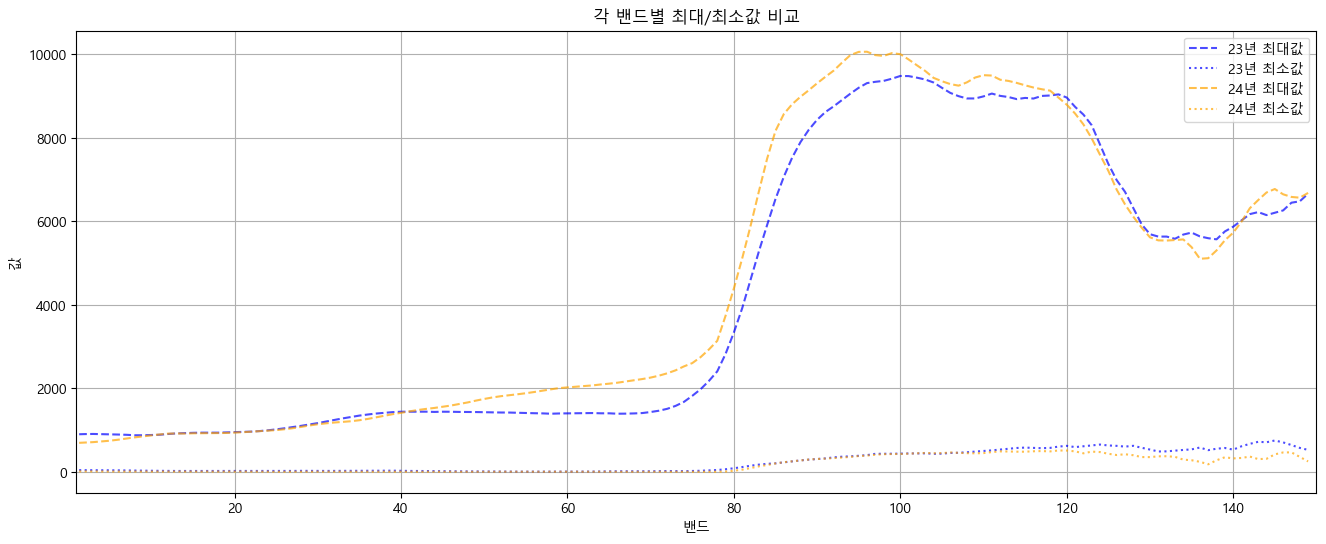

In [21]:
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정 (운영체제별로 다르게)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:  # Linux 등
    plt.rc('font', family='NanumGothic')

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# target 칼럼을 제외한 컬럼 리스트 추출
cols = [col for col in tmp1.columns if col != 'target']

# 각 밴드별로 평균, 표준편차, 최대, 최소 계산
mean1 = tmp1[cols].mean()
mean2 = tmp2[cols].mean()
std1 = tmp1[cols].std()
std2 = tmp2[cols].std()
max1 = tmp1[cols].max()
min1 = tmp1[cols].min()
max2 = tmp2[cols].max()
min2 = tmp2[cols].min()

# 5% 편차: 평균 ± (표준편차 * 0.05)
upper1 = mean1 + std1 * 0.05
lower1 = mean1 - std1 * 0.05
upper2 = mean2 + std2 * 0.05
lower2 = mean2 - std2 * 0.05

# 밴드 인덱스 (예: 0~149)
bands = range(len(cols))

# 첫 번째 그래프: 평균, 표준편차(5% 편차)
plt.figure(figsize=(16, 6))
plt.plot(bands, mean1, label='23년 평균', color='blue')
plt.fill_between(bands, lower1, upper1, color='blue', alpha=0.2, label='23년 5% 편차')
plt.plot(bands, mean2, label='24년 평균', color='orange')
plt.fill_between(bands, lower2, upper2, color='orange', alpha=0.2, label='24년 5% 편차')
plt.title('각 밴드별 평균값 및 5% 편차 비교')
plt.xlabel('밴드')
plt.xlim([1, 150])
plt.ylabel('값')
plt.legend()
plt.grid(True)
plt.show()

# 두 번째 그래프: 최대, 최소
plt.figure(figsize=(16, 6))
plt.plot(bands, max1, color='blue', linestyle='--', alpha=0.7, label='23년 최대값')
plt.plot(bands, min1, color='blue', linestyle=':', alpha=0.7, label='23년 최소값')
plt.plot(bands, max2, color='orange', linestyle='--', alpha=0.7, label='24년 최대값')
plt.plot(bands, min2, color='orange', linestyle=':', alpha=0.7, label='24년 최소값')
plt.title('각 밴드별 최대/최소값 비교')
plt.xlabel('밴드')
plt.xlim([1, 150])
plt.ylabel('값')
plt.legend()
plt.grid(True)
plt.show()
